In [144]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import svm
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_norm = np.log(X)
Y_norm = preprocessing.normalize(Y.reshape(-1,1))

In [0]:
!pip install EMD-signal==0.2.4

In [0]:
from PyEMD import EMD


In [0]:

emd = EMD()
imf = emd(Y)
plt.plot(Y)
plt.plot(imf[0])

In [5]:
clf = svm.SVR()
clf.fit(X_norm, Y_norm) 

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

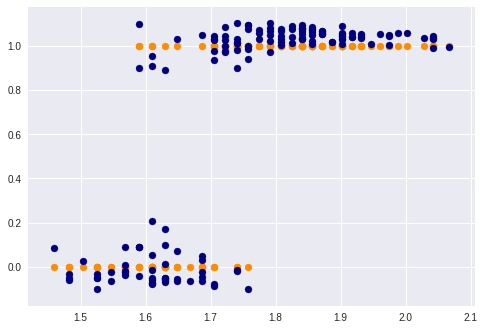

In [6]:
predict = clf.predict(X_norm)
plt.scatter(X_norm[:,0], Y_norm, color='darkorange', label='data')
plt.scatter(X_norm[:,0], predict, color='navy', label='RBF model')

In [115]:
!pip install boruta

    100% |████████████████████████████████| 61kB 2.0MB/s 
  Running setup.py bdist_wheel for boruta ... - done
  Stored in directory: /content/.cache/pip/wheels/5c/5a/72/13e8ea10ba10e22e9ca7f76f8b451c9f98fa190d428c8857dd
Successfully built boruta
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import scipy

In [139]:
rf = RandomForestClassifier(n_jobs=-1, max_depth=2)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, verbose=2, random_state=1)
Y = np.array(Y)
# find all relevant features - 5 features should be selected
feat_selector.fit(X, Y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	0


TypeError: ignored